# chapter 10 - Stochastics
확률과정

In [1]:
# 난수를 생성
# 시뮬레이션
# 가치평가
# 위험측도 VaR, CVaR, CVA

<br></br>
## 1 난수 생성
Random Numbers

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 01 ndarray 객체로 난수생성
np.random.rand(1dim, 2dim....)

In [3]:
# Default : 평균 0, 분산 1 범위 난수를 생성
np.random.rand(3)

array([ 0.25381967,  0.13396589,  0.02653212])

In [4]:
np.random.rand(3,3)

array([[ 0.81561598,  0.99550642,  0.92643573],
       [ 0.62820046,  0.27833581,  0.84333024],
       [ 0.46880382,  0.75287359,  0.53974112]])

In [5]:
np.random.rand(3,3,3)

array([[[ 0.9520603 ,  0.35084536,  0.38373358],
        [ 0.52065988,  0.07471193,  0.52459272],
        [ 0.18720134,  0.06036341,  0.51530513]],

       [[ 0.57470608,  0.27757652,  0.30810549],
        [ 0.02059801,  0.78391858,  0.96126752],
        [ 0.09334793,  0.11131427,  0.23191771]],

       [[ 0.95668843,  0.92400403,  0.84830854],
        [ 0.86350727,  0.9408296 ,  0.06420392],
        [ 0.85400343,  0.87381418,  0.71921393]]])

In [6]:
# 구간난수 생성
# np.random.rand(3) * (max - min) + min
# 3 ~ 9 사이의 난수를 생성
a = 3.
b = 9.
np.random.rand(3) * (b - a) + a

array([ 6.03869183,  3.7060181 ,  7.51185957])

In [7]:
# 브로드캐스팅을 활용한 난수생성
np.random.rand(3, 3) * (b - a) + a

array([[ 8.05088297,  8.71689677,  5.72192565],
       [ 7.63840606,  8.58438651,  7.63584311],
       [ 4.7985406 ,  3.43650528,  3.97234767]])

In [8]:
np.random.randint(10, size=10)

array([3, 6, 4, 5, 8, 4, 2, 2, 8, 5])

### 02 ndarray 여러타입 난수 비교
np.random

In [9]:
sample_size = 500
rn1 = np.random.rand(sample_size, 3)
rn2 = np.random.randint(0, 10, sample_size)
rn3 = np.random.sample(size=sample_size)

a = [0, 25,50, 75, 100]
rn4 = np.random.choice(a, size=sample_size)

In [10]:
import matplotlib
matplotlib.rc('font', family='NanumGothic')

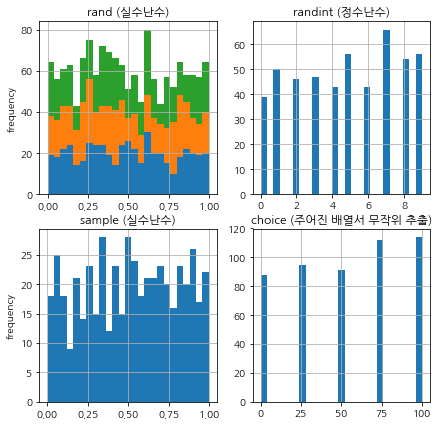

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (7, 7))
 
ax1.set_title('rand (실수난수)')
ax1.hist(rn1, bins = 25, stacked = True); ax1.set_ylabel('frequency'); ax1.grid(True)

ax2.set_title('randint (정수난수)')
ax2.hist(rn2, bins = 25); ax2.grid(True)                  

ax3.set_title('sample (실수난수)'); ax3.hist(rn3, bins = 25); 
ax3.set_ylabel('frequency'); ax3.grid(True)                  

ax4.set_title('choice (주어진 배열서 무작위 추출)')
ax4.hist(rn4, bins = 25); ax4.grid(True)

In [12]:
# 결론
# 아직까지 정규분포, 로그정규분포에 많이 의지하영 모형을 시뮬레이션 한다

In [13]:
sample_size = 500
rn1 = np.random.standard_normal(sample_size)
rn2 = np.random.normal(100, 20, sample_size)
rn3 = np.random.chisquare(df=0.5, size=sample_size)
rn4 = np.random.poisson(lam=1.0, size=sample_size)

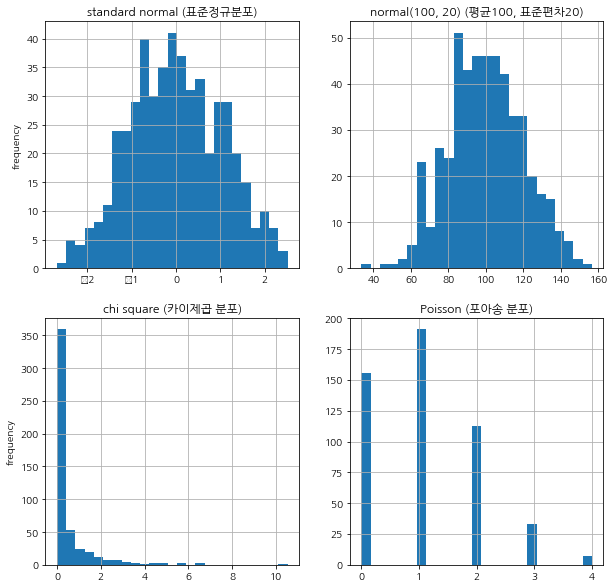

In [14]:
# Pseudo-random numbers from different distributions
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax1.set_title('standard normal (표준정규분포)')
ax1.hist(rn1, bins=25); ax1.set_ylabel('frequency'); ax1.grid(True)
ax2.set_title('normal(100, 20) (평균100, 표준편차20)')
ax2.hist(rn2, bins=25); ax2.grid(True)
ax3.set_title('chi square (카이제곱 분포)')
ax3.set_ylabel('frequency'); ax3.hist(rn3, bins=25); ax3.grid(True)
ax4.set_title('Poisson (포아송 분포)')
ax4.hist(rn4, bins=25); ax4.grid(True)

In [15]:
# 개념정리
# 포아송 분포 : 일정한 시간내 발생횟수 계산으로, 특이한 사건 발생분포를 시뮬레이션에 적합
# 카이제곱 분포 : 독립된 k개 (K:자유도)의 표준정규분포를 제곱해서 얻은 분포로 (출처:위키)
#              람다 계수가 1이다

<br></br>
## 2 시뮬레이션
Simulation

### 01 확률변수 모형
블랙-숄즈-머튼 모형을 이용한 미래의 주가 시뮬레이션

In [16]:
# Data 생성하기
S0 = 100      # 초기값
r = 0.05      # 고정 단기 이자율
sigma = 0.25  # 고정 변동성
T = 2.0       # in years
I = 10000     # 생성할 난수의 갯수

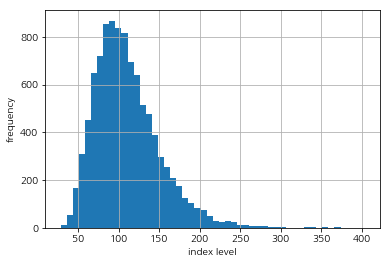

In [17]:
# Standard_Normal 함수를 사용한 브라운 운동모형
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
             + sigma * np.sqrt(T) * np.random.standard_normal(I))

plt.hist(ST1, bins = 50)     # bins : 50개 구간으로 범주화
plt.xlabel('index level')
plt.ylabel('frequency'); plt.grid(True)

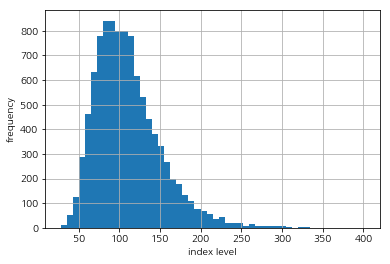

In [18]:
# Log_Normal 함수를 사용한 브라운 운동모형
ST2 = S0 * np.random.lognormal((r - 0.5 * sigma ** 2) * T,
                          sigma * np.sqrt(T), size = I)
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

### 02 확률변수 모형의 검증
통계 모멘트를 비교

In [19]:
import scipy.stats as scs
def print_statistics(a1, a2):   # a1, a2 : ndarray objects
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print("%14s %14s %14s" % ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print("%14s %14.3f %14.3f" % ('size', sta1[0], sta2[0]))
    print("%14s %14.3f %14.3f" % ('min', sta1[1][0], sta2[1][0]))
    print("%14s %14.3f %14.3f" % ('max', sta1[1][1], sta2[1][1]))
    print("%14s %14.3f %14.3f" % ('mean', sta1[2], sta2[2]))
    print("%14s %14.3f %14.3f" % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print("%14s %14.3f %14.3f" % ('skew', sta1[4], sta2[4]))
    print("%14s %14.3f %14.3f" % ('kurtosis', sta1[5], sta2[5]))

In [22]:
# 통계적 요약 내용을 출력
# scs.describe(ST1)
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         28.216         27.497
           max        404.186        401.819
          mean        110.586        110.399
           std         40.345         40.572
          skew          1.173          1.154
      kurtosis          2.723          2.303


<br></br>
## 3 확률과정
확률변수를 반복해서 시뮬레이션 한다

단, 각단계의 샘플은 이전단계의 연산결과에 의존한다

처음부터가 아닌 직전의 값들만 영향을 미치는 Markov 특성을 갖는다

이를 무기억성 확률과정(memoryless) 라고 한다

### 01 기하 브라운 운동모형
Geometric Brownian Motion